<a href="https://colab.research.google.com/github/yashpal64/Foundations-of-Data-Science/blob/main/FDS_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gaussian Distribution**

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
population=np.random.normal(loc=50,scale=10,size=10000)

In [ ]:
population

array([55.51648595, 58.29027108, 71.2010494 , ..., 56.67767385,
       44.57021693, 43.33635305])

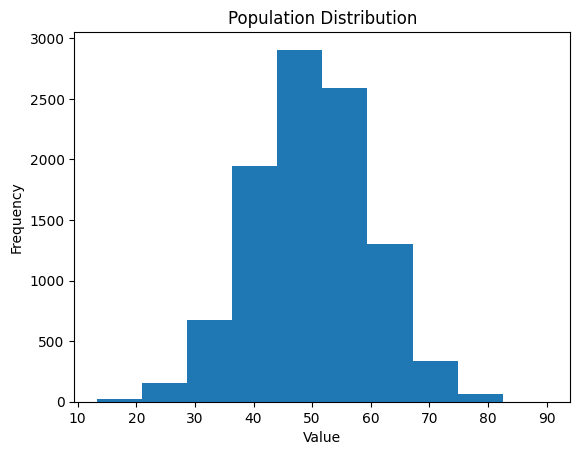

In [ ]:
plt.hist(population)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Population Distribution")
plt.show()


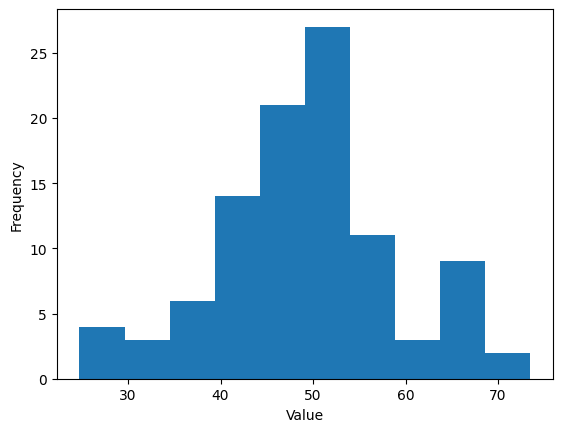

In [ ]:
plt.hist(sample)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


Confidence Interval: (48.61051296003788, 52.726795176644245)
Fail to reject the null hypothesis


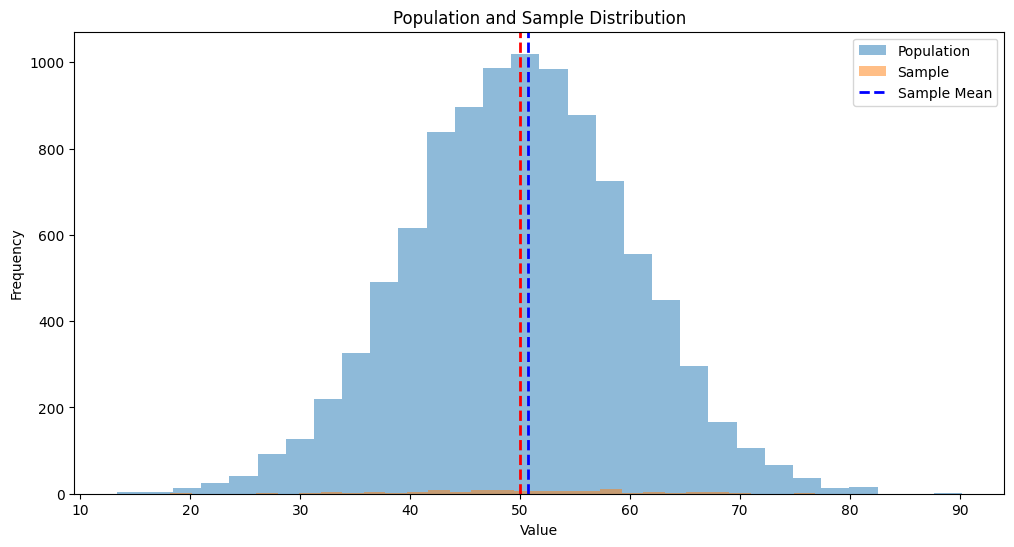

In [ ]:
def uniform_sampling(population,sample_size):
    indices=np.random.choice(len(population),sample_size,replace=False)
    sample=[population[i] for i in indices]
    return sample
sample_size=100
sample=uniform_sampling(population,sample_size)
sample_mean=np.mean(sample)
sample_std=np.std(sample,ddof=1)
#confidence interval of mean
confidence_level=0.95
alpha=1-confidence_level
t_critical=stats.t.ppf(1-alpha/2,df=sample_size-1)
margin_of_error=t_critical*(sample_std/np.sqrt(sample_size))

#confidence interval
confidence_interval=(sample_mean-margin_of_error,sample_mean+margin_of_error)
print("Confidence Interval:",confidence_interval)

#hypothesis testing (one-sample t-test)
hypothesized_mean=50
t_statistic,p_value=stats.ttest_1samp(sample,hypothesized_mean)

if p_value<alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

plt.figure(figsize=(12,6))

plt.hist(population,bins=30,alpha=0.5,label="Population")
plt.hist(sample,bins=30,alpha=0.5,label="Sample")

plt.axvline(sample_mean,color='blue',linestyle='dashed',linewidth=2,label="Sample Mean")
plt.axvline(hypothesized_mean,color='red',linestyle='dashed',linewidth=2)

plt.title("Population and Sample Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()



In [ ]:
sample_mean

50.935447170006356

In [ ]:
p_value

0.3729202447183687

In [ ]:
t_statistic

0.6446374020445154

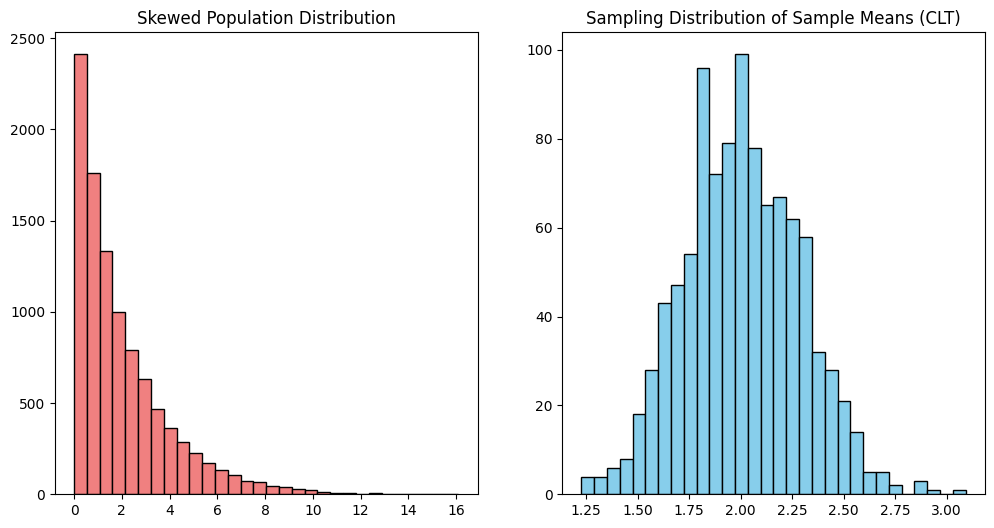

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Skewed population distribution (Exponential)
population = np.random.exponential(scale=2, size=10000)

# Take 1000 samples of size 50 and calculate sample means
sample_means = [np.mean(np.random.choice(population, size=50)) for _ in range(1000)]

# Plot population and sampling distribution
plt.figure(figsize=(12, 6))

# Plotting the population distribution
plt.subplot(1, 2, 1)
plt.hist(population, bins=30, color='lightcoral', edgecolor='black')
plt.title('Skewed Population Distribution')

# Plotting the sampling distribution of sample means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black')
plt.title('Sampling Distribution of Sample Means (CLT)')

plt.show()
